In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns
from pathlib import Path

from matplotlib.ticker import MaxNLocator

from nanosce_cv_cc import Ec

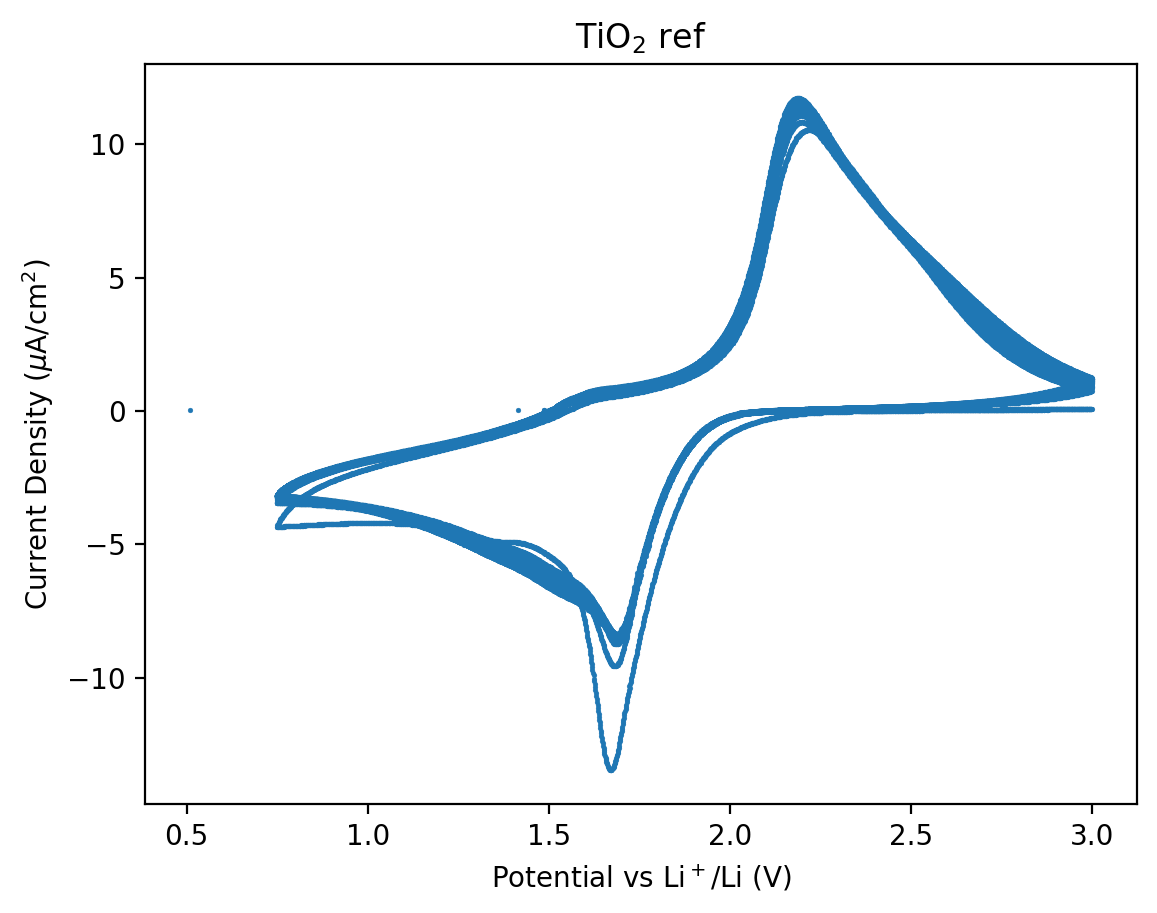

<Figure size 640x480 with 0 Axes>

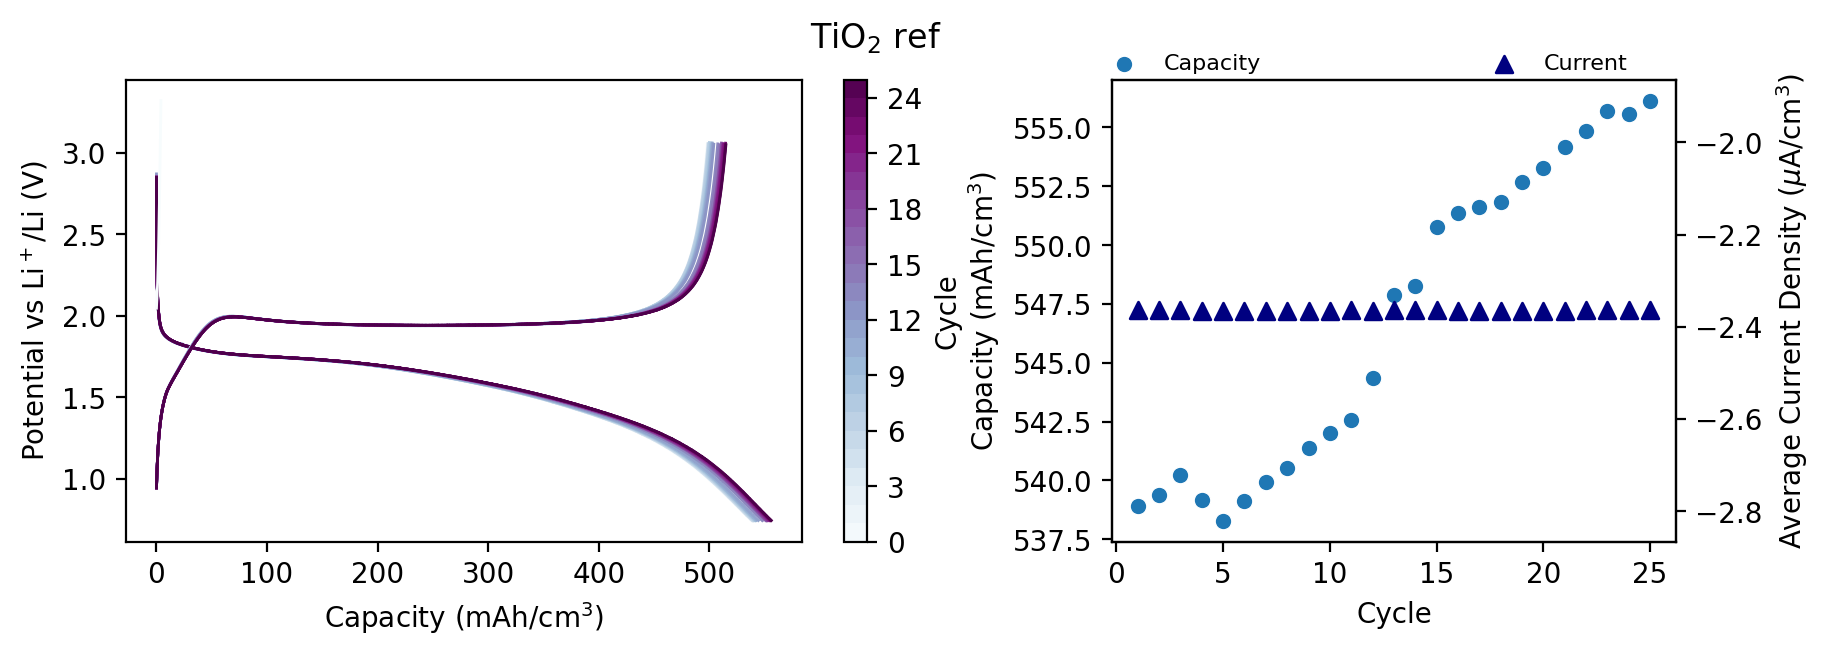

In [2]:
# =============================== TiO2 Reference ==============================================================================================
path_ref = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\TiO2ref'
df_cv_ref, capacity, lith, delith = Ec.Electrochem(path_ref, 40, 0.63, 'TiO$_2$ ref')

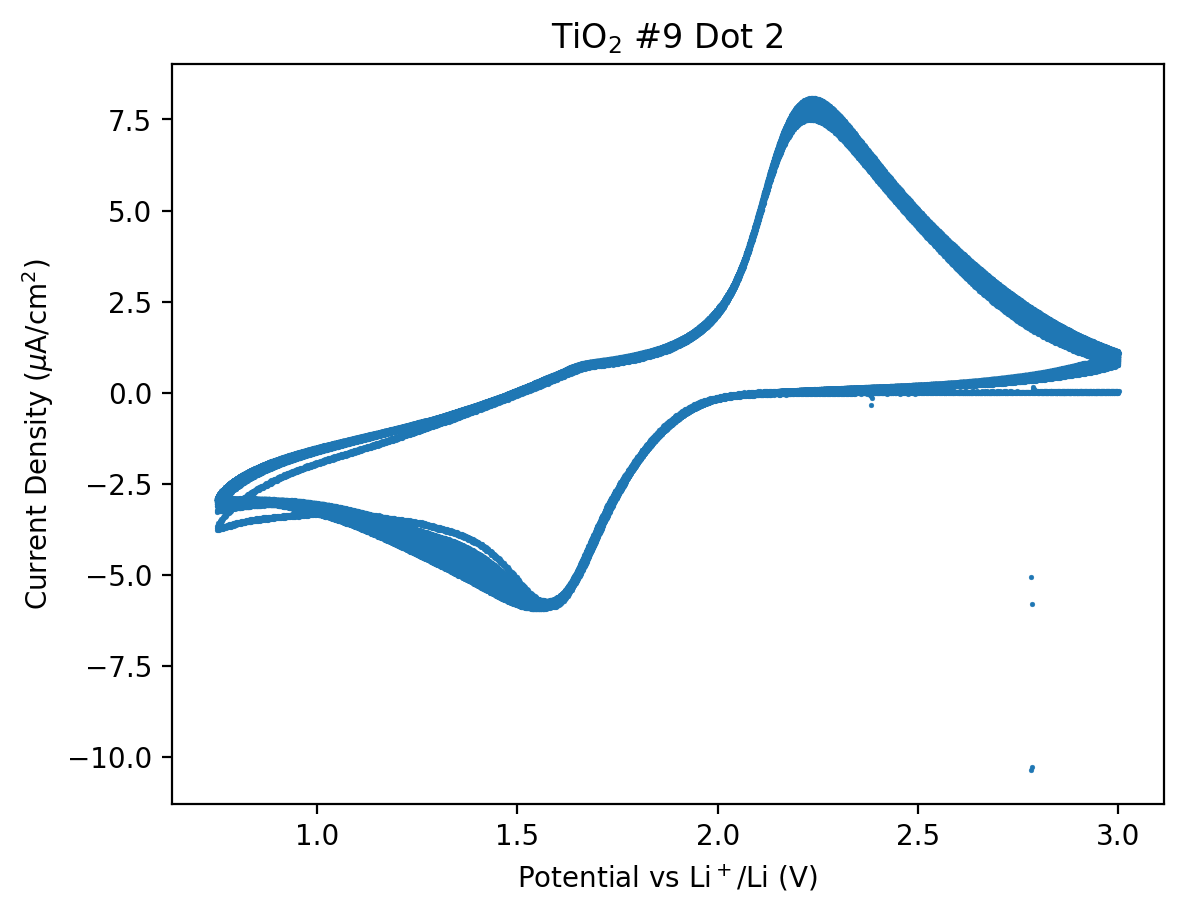

In [3]:
# =============================== TiO2 NanoSCE Dot 2 CV ==================================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot2\CV 5 charge discharge over weekend'
sample = 'TiO$_2$ #9 Dot 2'
df_cv_9d2, capacity_9d2, lith_9d2, delith_9d2 = Ec.Electrochem(path, 40, 0.12566, sample)


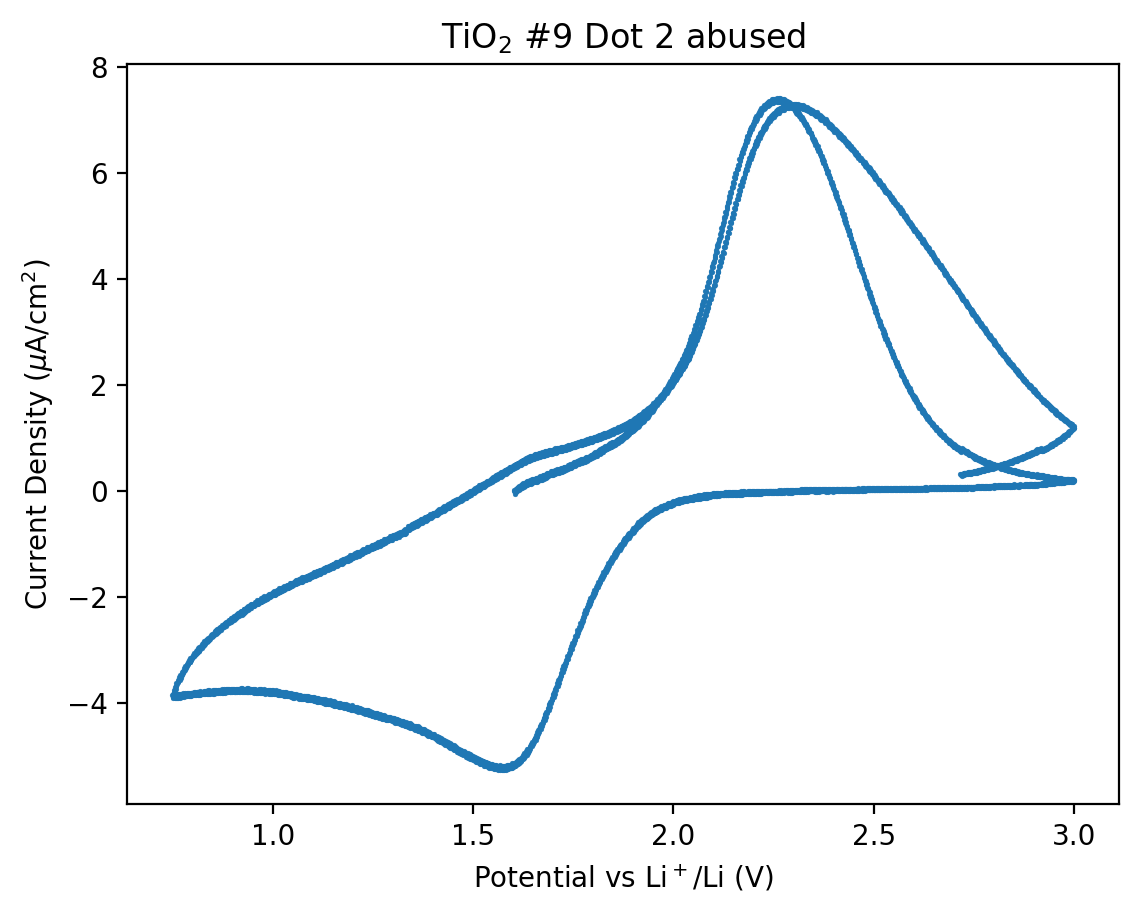

<Figure size 640x480 with 0 Axes>

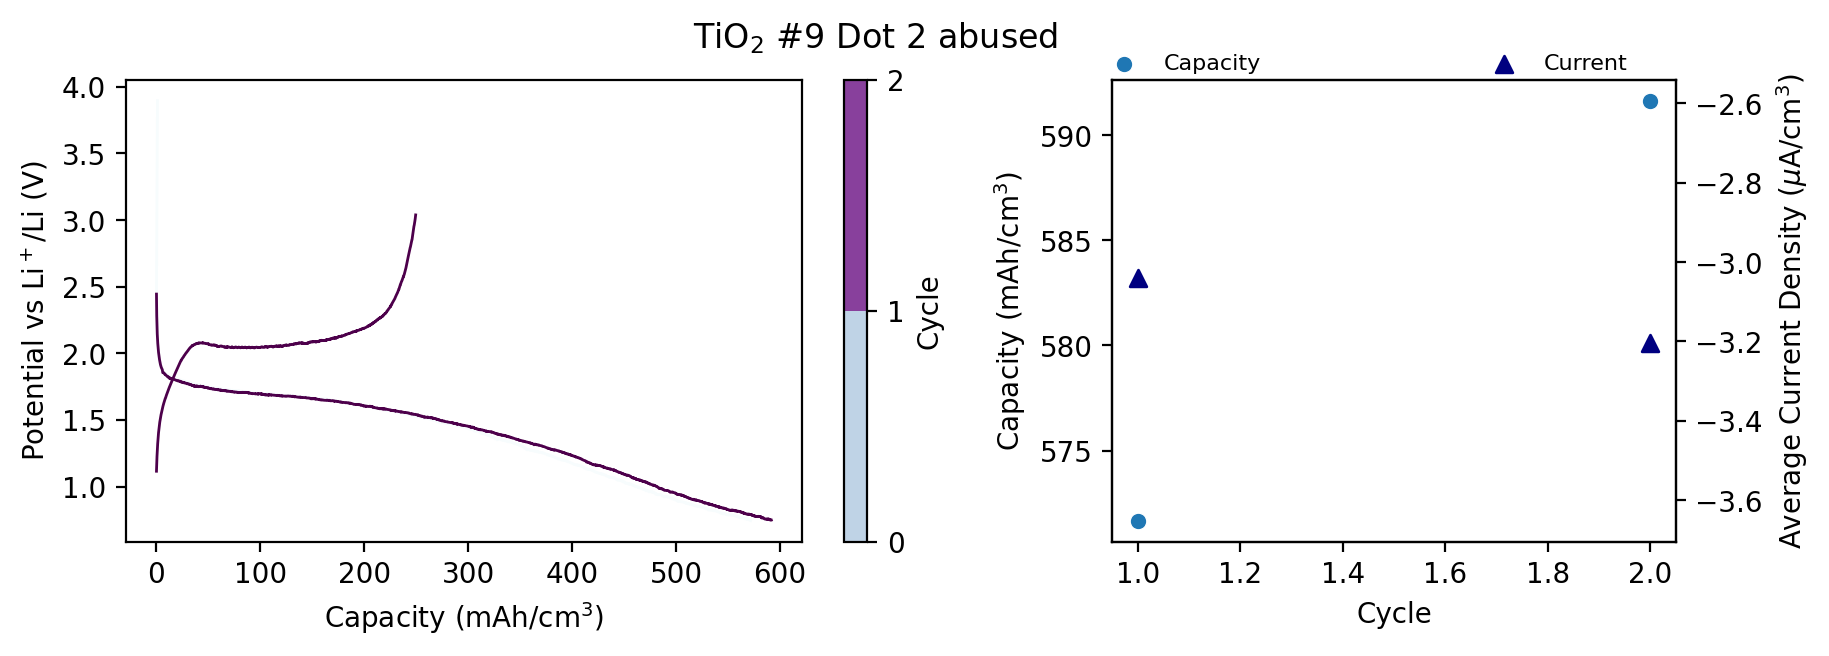

In [4]:
# =============================== TiO2 NanoSCE Dot 2 abused ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot2\CV 8 dot 2 (abused) charge discharge'
sample = 'TiO$_2$ #9 Dot 2 abused'
df_cv_9a, capacity_9, lith_9a, delith_9a = Ec.Electrochem(path, 40, 0.12566, sample)

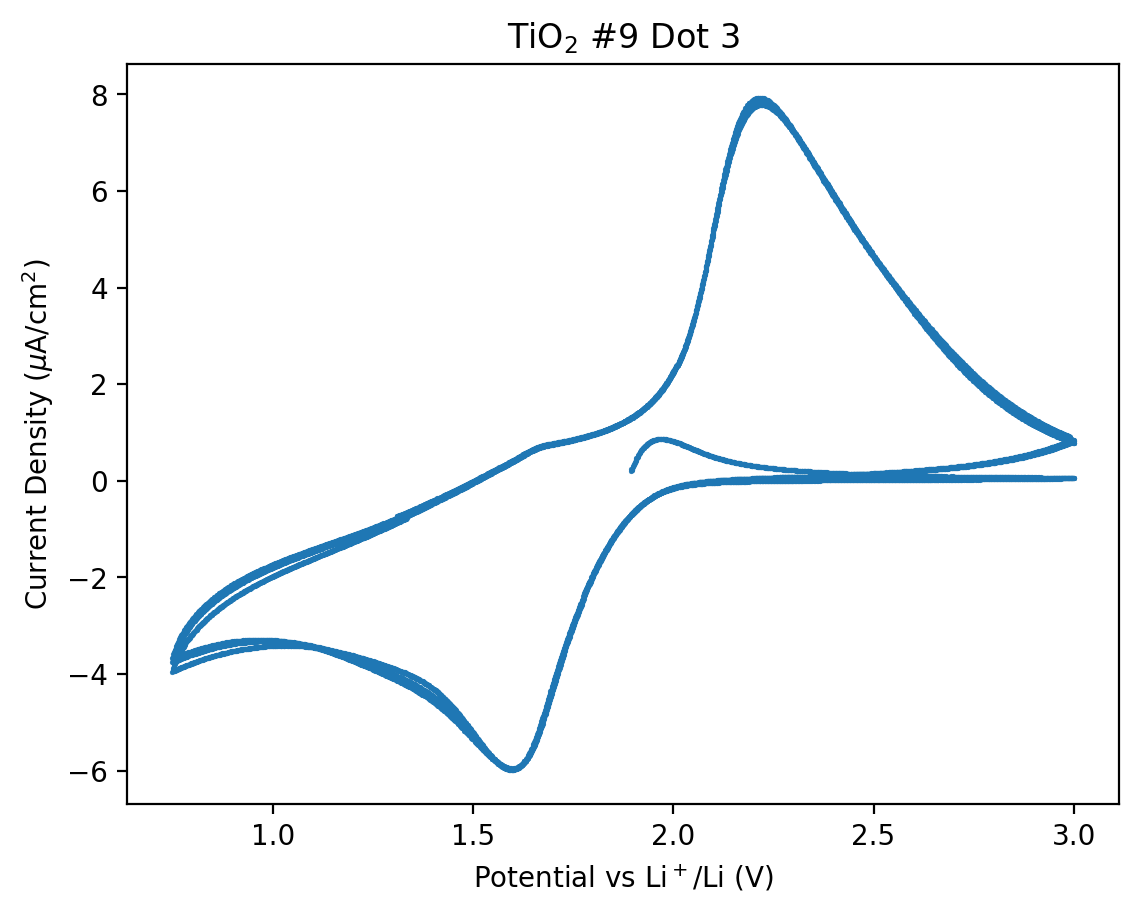

<Figure size 640x480 with 0 Axes>

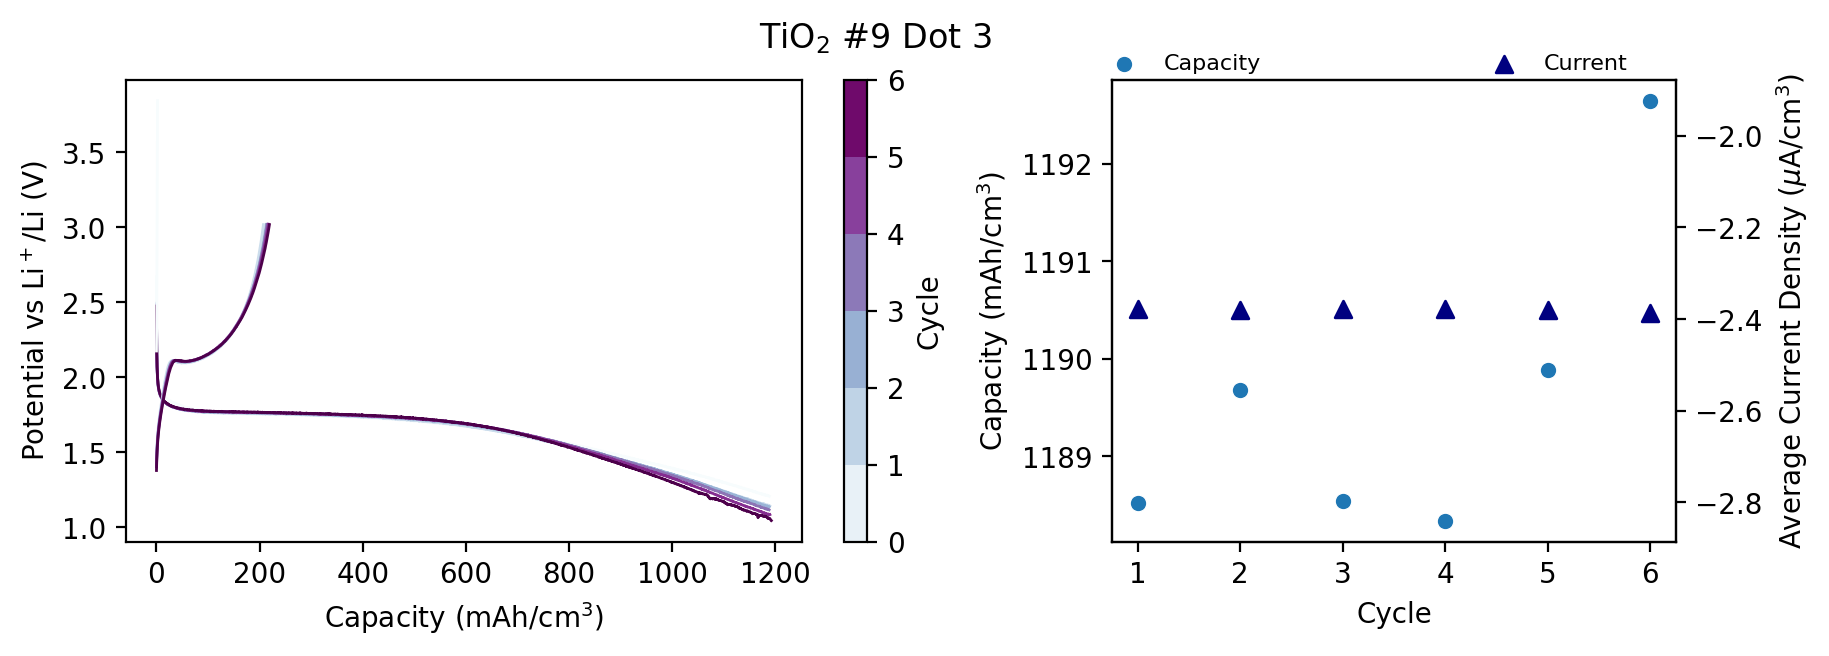

In [29]:
# ================================== TiO2 Dot3 run 1 ======================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot3\CV 13 dot 3 charge discharge'
sample = 'TiO$_2$ #9 Dot 3'
df_cv_9d3, capacity_9d3, lith_9ad3, delith_9ad3 = Ec.Electrochem(path, 40, 0.12566, sample)

In [ ]:
# ================================== TiO2 Dot3 run 2 after EC drying ======================================================
# path = r
sample = 'TiO$_2$ #9 Dot 3 after EC drying'
df_cv_9d3_dry, capacity_9d3_dry, lith_9ad3_dry, delith_9ad3_dry = Ec.Electrochem(path, 40, 0.12566, sample)

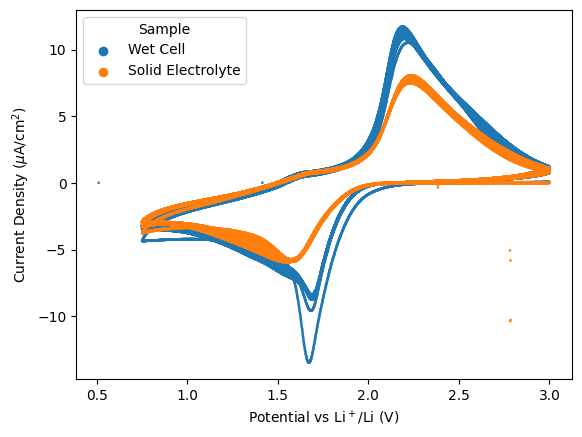

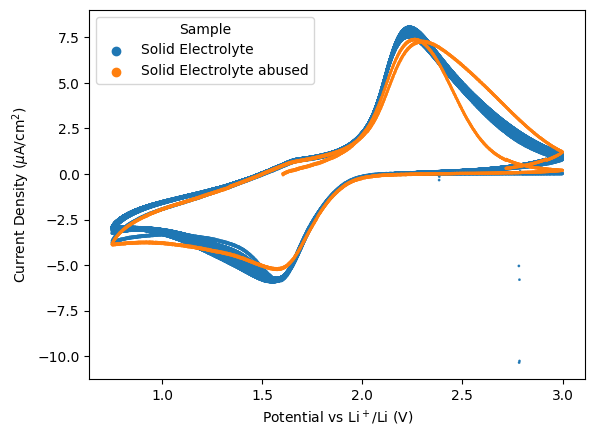

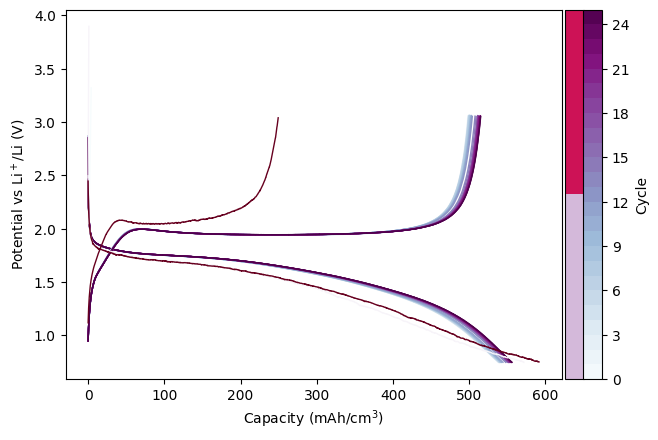

In [30]:
# ========================================= COMPARISON =========================================
samples = [df_cv_ref, df_cv_9]
palette = 'BuPu'
p2 = 'PuRd'

df_cv_ref['Sample'] = 'Wet Cell'
df_cv_9['Sample'] = 'Solid Electrolyte'
df_cv_9a['Sample'] = 'Solid Electrolyte abused'

df = pd.concat([df_cv_ref, df_cv_9])
df2 = pd.concat([df_cv_9, df_cv_9a])

fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(data = df, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', edgecolor = None, s =3, hue = 'Sample')

fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(data = df2, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', edgecolor = None, s =3, hue = 'Sample')


fig, ax = plt.subplots(dpi = 100)
Z = [[0,0],[0,0]]                                                                       # Creates color bar
cbar = plt.contourf(Z, levels = np.arange(0, 3, 1), cmap=p2)
cbar2 = plt.contourf(Z, levels = np.arange(0, 26, 1), cmap=palette)
plt.clf()



# plt.xlim(0.5, 3.25)
sns.lineplot(data = lith, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = palette, lw = 1, legend = False)
sns.lineplot(data = delith, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = palette, lw = 1, legend = False)
sns.lineplot(data = lith_9a, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = p2, lw = 1, legend = False)
sns.lineplot(data = delith_9a, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = p2, lw = 1, legend = False)

cb = plt.colorbar(cbar, anchor = (1.4,0)).set_ticks([])
cb2 = plt.colorbar(cbar2, anchor = (4.4,0)).set_label('Cycle')

# plt.colorbar(cbar2)
# lith
# plt.show().set_label('Cycle')

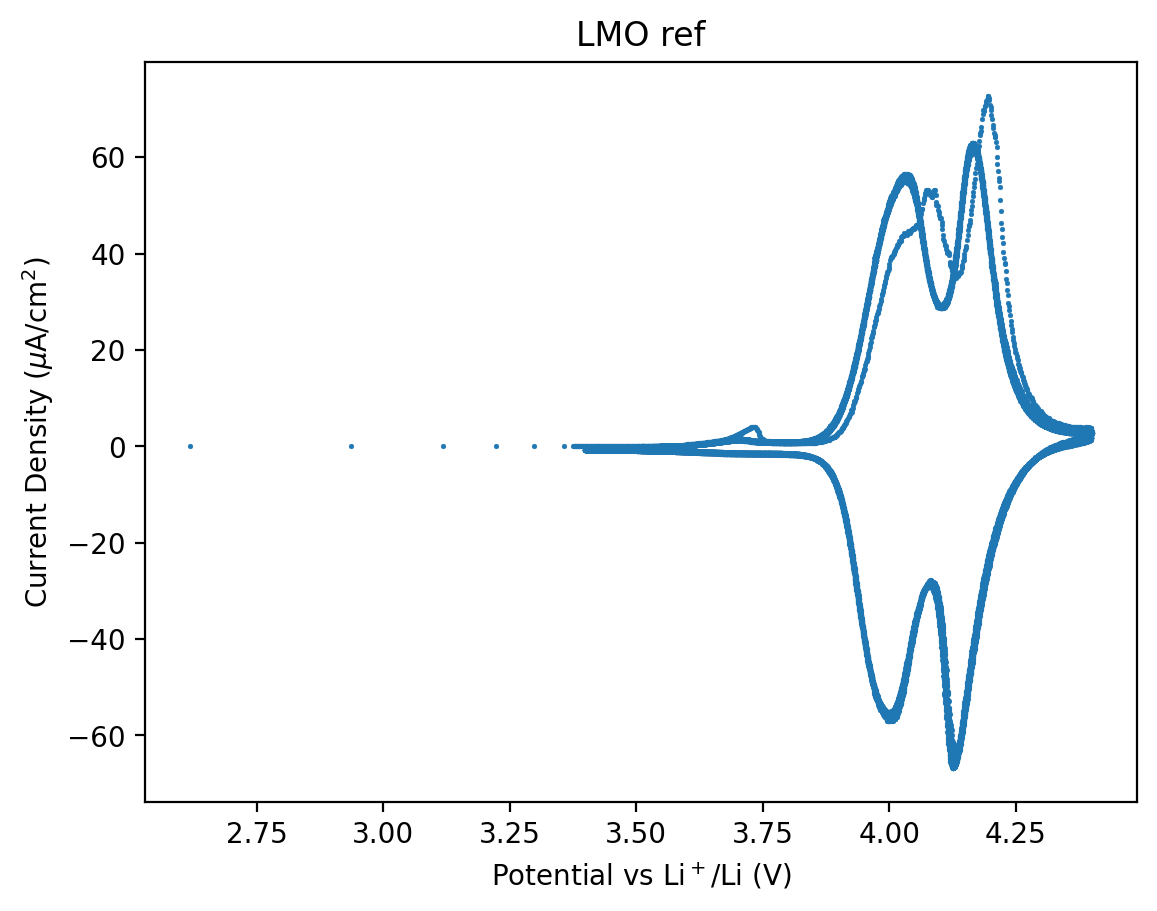

<Figure size 640x480 with 0 Axes>

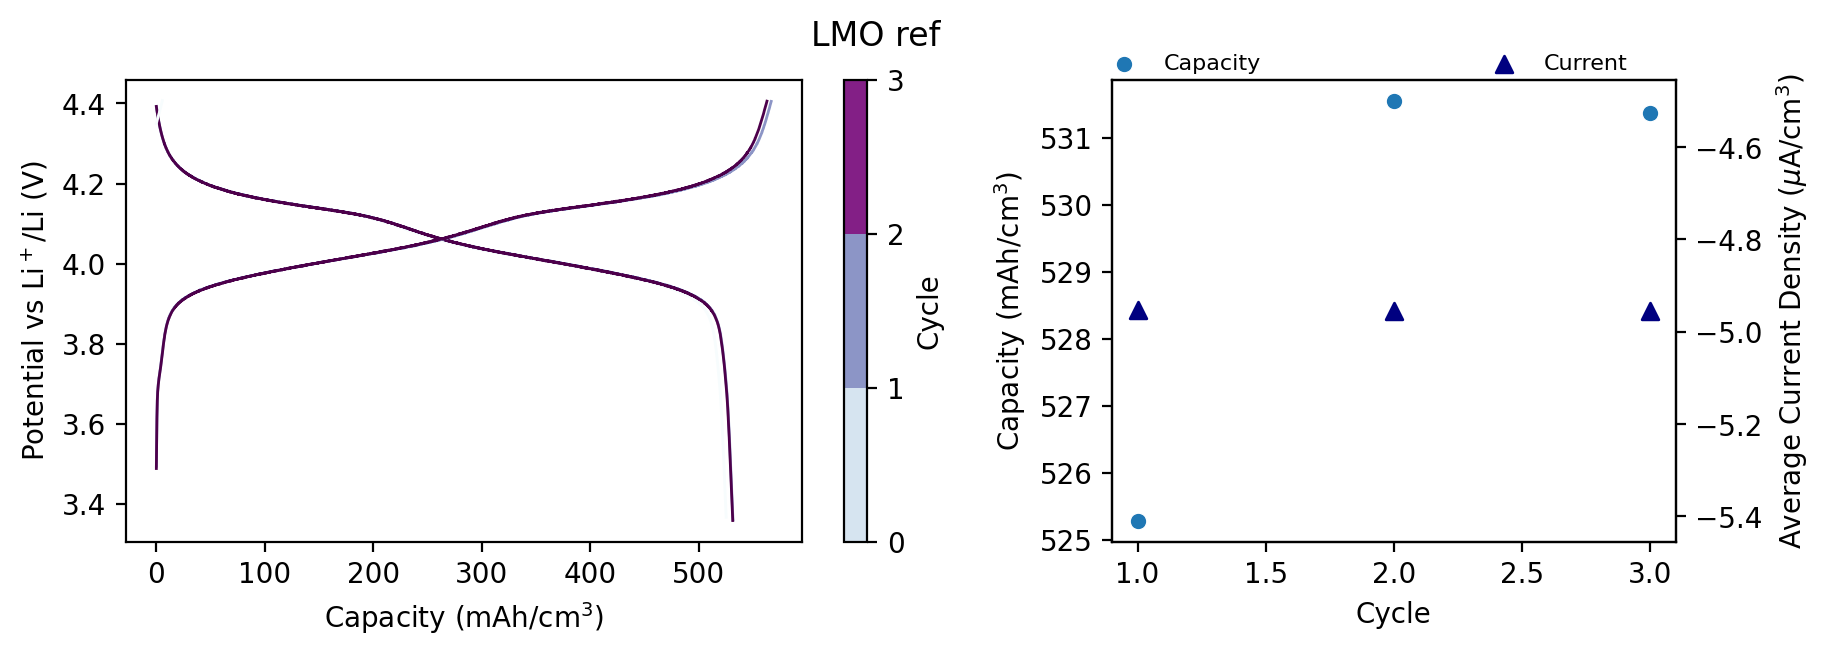

In [5]:
# ============================================ LMO ref wet cell ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\LMOref'
sample = 'LMO ref'
df_cv_lmo_ref, capacity_lmo_ref, lith_lmo_ref, delith_lmo_ref = Ec.Electrochem(path, 80, 0.63, sample)

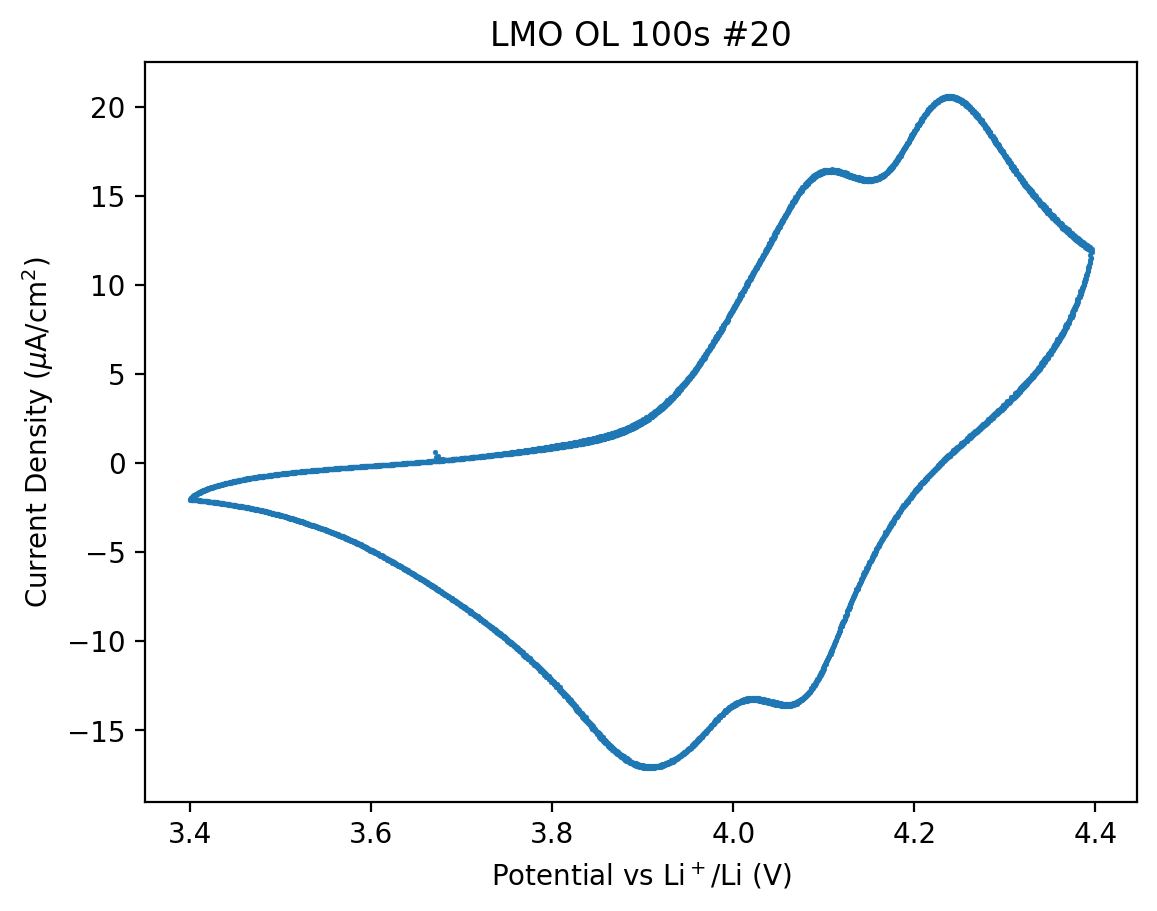

<Figure size 640x480 with 0 Axes>

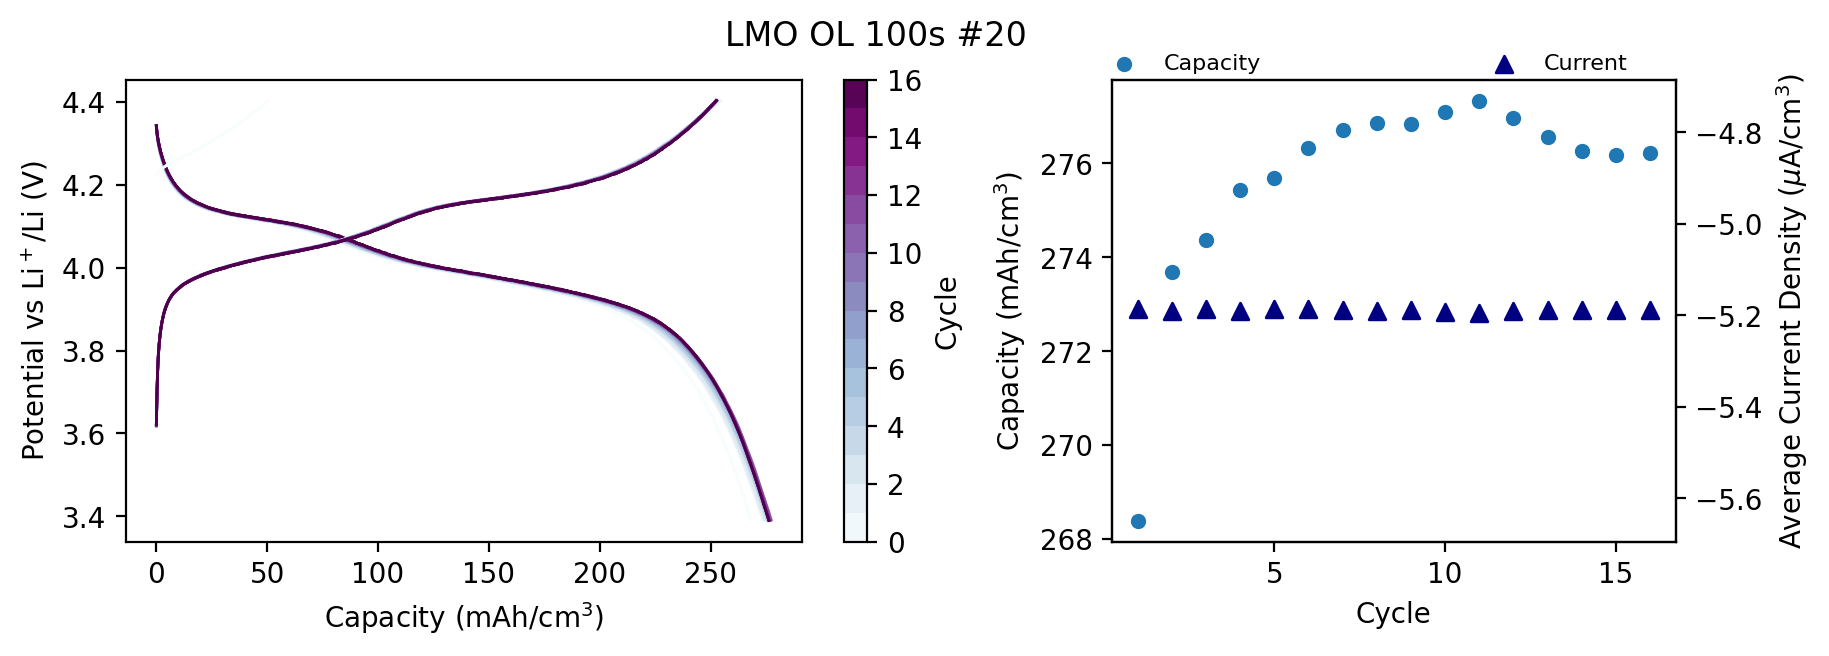

In [31]:
# =============================== LMO ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\20 LMO OL 100s'
sample = 'LMO OL 100s #20'
df_cv_20, capacity_20, lith_20, delith_20 = Ec.Electrochem(path, 80, 0.12566, sample)